In [1]:
#lib
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image 
import cv2
import sys
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [1]:
# # 캐글연동
# !pip install kaggle
# from google.colab import files
# files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"blingstarhamal","key":"e1d3d91691d78e6c851bff4c67c1e00e"}'}

In [2]:
# ls -1ha kaggle.json

kaggle.json


In [3]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# # Permission Warning이 발생하지 않도록 해줍니다.
# !chmod 600 ~/.kaggle/kaggle.json
# # 내가 참가한 대회 리스트 확인
# !kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         34           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        141           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        829           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        160           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1974           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13790           False  
house-pr

In [4]:
# !kaggle datasets download -d divyansh22/dummy-astronomy-data

 59% 5.00M/8.46M [00:00<00:00, 40.1MB/s]
100% 8.46M/8.46M [00:00<00:00, 62.0MB/s]


In [5]:
# !ls

dummy-astronomy-data.zip  kaggle.json  sample_data


In [ ]:
# !unzip dummy-astronomy-data.zip

In [2]:
#데이터 불러오기
data = []
labels =[]
import glob
galaxy_path = glob.glob('./Cutout Files/galaxy/*')
star_path = glob.glob('./Cutout Files/star/*')
for x in galaxy_path:
    image = cv2.imread(x,1)
    image= np.array(image)
    data.append(image)
    labels.append(0)
for x in star_path:
    image = cv2.imread(x,1)
    image= np.array(image)
    data.append(image)
    labels.append(1)   

In [3]:
data, labels= np.array(data), np.array(labels)

In [4]:
dataset= pd.DataFrame(list(zip(data, labels)), columns=['images','labels'])

In [5]:
dataset.head(5)

,images,labels
0,"[[[139, 139, 139], [84, 84, 84], [57, 57, 57],...",0
1,"[[[67, 67, 67], [132, 132, 132], [100, 100, 10...",0
2,"[[[88, 88, 88], [37, 37, 37], [96, 96, 96], [1...",0
3,"[[[105, 105, 105], [58, 58, 58], [90, 90, 90],...",0
4,"[[[76, 76, 76], [130, 130, 130], [90, 90, 90],...",0
...,...,...
3981,"[[[107, 107, 107], [114, 114, 114], [99, 99, 9...",1
3982,"[[[130, 130, 130], [72, 72, 72], [71, 71, 71],...",1
3983,"[[[25, 25, 25], [72, 72, 72], [126, 126, 126],...",1
3984,"[[[87, 87, 87], [46, 46, 46], [81, 81, 81], [7...",1


In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42, shuffle=True,stratify=dataset['labels'].values)

x_test, x_valid, y_test, y_valid= train_test_split(x_test, y_test, test_size=0.2,
                                                random_state=42, shuffle=True)

In [7]:
y_train, y_valid = to_categorical(y_train),  to_categorical(y_valid)

In [8]:
x_train.shape,y_train.shape

((3188, 64, 64, 3), (3188, 2))

In [9]:
x_test.shape,y_test.shape

((638, 64, 64, 3), (638,))

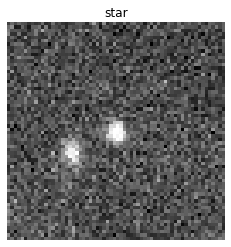

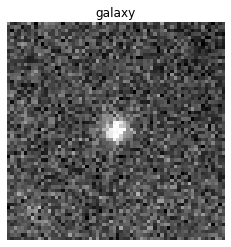

(None, None)

In [10]:
def show_img(x, y, index):
    plt.imshow(x[index])
    if y[index]==0:
        plt.title('galaxy')
    else:
        plt.title('star')
    plt.axis('off')    
    plt.show()    

show_img(x_test, y_test, 0),show_img(x_test, y_test, 3)